# Communicating Data Finding : Ford GoBike System Data

## by Dain Russell

## Investigation Overview

In this investigation, I wanted to look at different features of the bikeshare dataset that influence trip duration.

## Dataset Overview

The data consisted of trip start and end times and other variables. 
 * There were 4646 bikes.
 * There are 183412 fordgobike trips in the cleaned dataset with 16 specifications or columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allows us to view our graphs in jupyter notebook.
%matplotlib inline   

## Connect to the dataset

In [2]:
# load in dataset into pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
# display first 5 rows dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# how many rows and columns
df.shape

(183412, 16)

In [4]:
# overview of the composition of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#  drop unwanted columns We drop 'NaN' values 

df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

# test that column drop is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [6]:
# checking if there are duplicates
sum(df.duplicated())

0

In [7]:
# Finding how many bikes there are in this dataset
df.bike_id.nunique()

4646

In [8]:
# changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [9]:
# new columns from start_time
df['start_month'] = df.start_time.dt.month
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour

# convert seconds to minutes
df['duration_minutes'] = df['duration_sec']/60

In [10]:
# test for datatype change and the addition of 4 new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  int64         
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  object        
 12  start_month     

In [11]:
# changing datatype to boolean
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [12]:
# test to confirm change to boolean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  int64         
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  bool          
 12  start_month     

In [13]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,start_month,start_weekday,start_hour,duration_minutes
count,183412.000000,183215.000000,183215.000000,183412.000000,175147.000000,183412.0,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,136.249123,4472.906375,1984.806437,2.0,2.632178,13.458421,12.101307
std,1794.389780,111.778864,111.515131,1664.383394,10.116689,0.0,1.814786,4.724978,29.906496
min,61.000000,3.000000,3.000000,11.000000,1878.000000,2.0,0.000000,0.000000,1.016667
25%,325.000000,47.000000,44.000000,3777.000000,1980.000000,2.0,1.000000,9.000000,5.416667
50%,514.000000,104.000000,100.000000,4958.000000,1987.000000,2.0,3.000000,14.000000,8.566667
75%,796.000000,239.000000,235.000000,5502.000000,1992.000000,2.0,4.000000,17.000000,13.266667
max,85444.000000,398.000000,398.000000,6645.000000,2001.000000,2.0,6.000000,23.000000,1424.066667


There are 183412 fordgobike trips in the cleaned dataset with 16 specifications or columns (duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip duration_minutes, start_month, start_weekday, start_hour). Out of 16 specifications 9 are numerical(int or float), 2 are datetime, 4 are object type and 1 is boolean type.

In [14]:
df.sample(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_minutes
172442,708,2019-02-03 15:55:10.035,2019-02-03 16:06:58.979,3.0,Powell St BART Station (Market St at 4th St),93.0,4th St at Mission Bay Blvd S,5527,Subscriber,1991.0,Female,False,2,6,15,11.800000
63326,678,2019-02-20 15:14:33.456,2019-02-20 15:25:52.040,66.0,3rd St at Townsend St,97.0,14th St at Mission St,4344,Subscriber,1974.0,Male,False,2,2,15,11.300000
71177,157,2019-02-19 17:47:11.912,2019-02-19 17:49:49.544,258.0,University Ave at Oxford St,238.0,MLK Jr Way at University Ave,5156,Subscriber,1994.0,Male,False,2,1,17,2.616667
18489,463,2019-02-26 18:27:56.943,2019-02-26 18:35:40.434,86.0,Market St at Dolores St,122.0,19th St at Mission St,6290,Subscriber,1982.0,Male,False,2,1,18,7.716667
4472,536,2019-02-28 15:48:52.784,2019-02-28 15:57:49.029,3.0,Powell St BART Station (Market St at 4th St),16.0,Steuart St at Market St,4655,Customer,1973.0,Female,False,2,3,15,8.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143860,399,2019-02-07 14:04:45.505,2019-02-07 14:11:24.660,338.0,13th St at Franklin St,187.0,Jack London Square,4765,Subscriber,1972.0,Male,True,2,3,14,6.650000
174964,412,2019-02-02 16:04:16.905,2019-02-02 16:11:09.616,100.0,Bryant St at 15th St,139.0,Garfield Square (25th St at Harrison St),4659,Subscriber,1966.0,Male,False,2,5,16,6.866667
68074,493,2019-02-20 06:41:37.833,2019-02-20 06:49:50.927,118.0,Eureka Valley Recreation Center,122.0,19th St at Mission St,6085,Subscriber,1988.0,Male,False,2,2,6,8.216667
59804,193,2019-02-20 19:33:36.741,2019-02-20 19:36:50.403,81.0,Berry St at 4th St,93.0,4th St at Mission Bay Blvd S,6208,Subscriber,1992.0,Female,False,2,2,19,3.216667


### What are the main feature(s) of interest in the dataset?

I am interested in the the features that best predict average bike trip. These are age, gender and user type.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the trip duration is determined from the values in our column 'duration_min'. The subscriber anc customer values from 'user_type' will tell the number of users.


## Univariate Exploration

I'll start by looking at the duration_minutes as the main variable of interest. To determine the average bike trips as a unit of time.

## Distribution of Bike Trip Duration

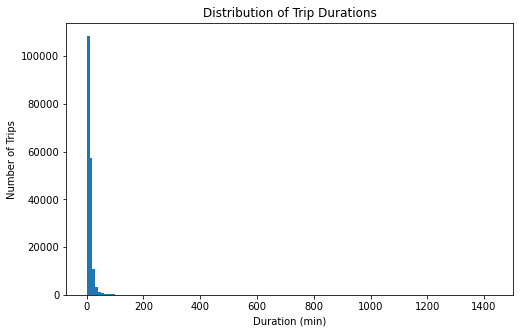

In [15]:
# histogram plot displaying bike trips in minutes
binsize = 10
bins = np.arange(0, df['duration_minutes'].max()+binsize, binsize)
plt.figure(figsize=[8,5])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.show()

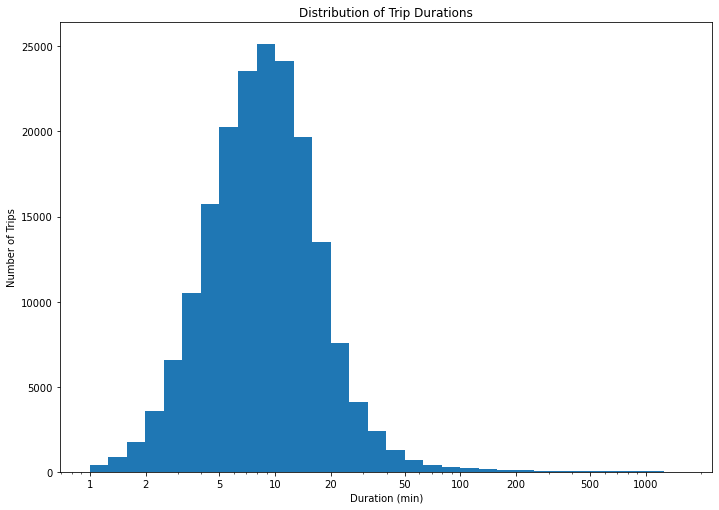

In [16]:
# logarthmic scale transformation on a histogram
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(df['duration_minutes'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data = df, x = 'duration_minutes', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

### Observations

* Long tailed, bimodal distribution peaking between 8 and 10.
* The average bike trip is 12 minutes. 
* The standard devaition is 29.9.
* 25% of the trips are over 5 minutes, 50% over 8 minutes and 75% over 13 minutes. 
* The longest trip is 1424 minutes and the shortest being one minute.

With this distribution I really wanted to see how the trip was distributed when looking at just the length of a ride. According to baywheels.com, trips longer than 45 minutes will incur an extra 3 dollars per each additional 45-minutes for those with an annual pass. A single ride cost 3 dollars and only last 30 minutes This fact probably factors into how long a user will ride and why the data shows most trips are below 45 minutes. 

The average bike trip is 12 minutes. The standard devaition is 29.9. 25% of the trips are over 5 minutes, 50% over 8 minutes and 75% over 13 minutes. The longest trip is 1424 minutes and the shortest being one minute.

## Distribution of Users

**User Type Key**
1.Customer = 24-hour pass or 3-day pass user
2.Subscriber = Annual Member

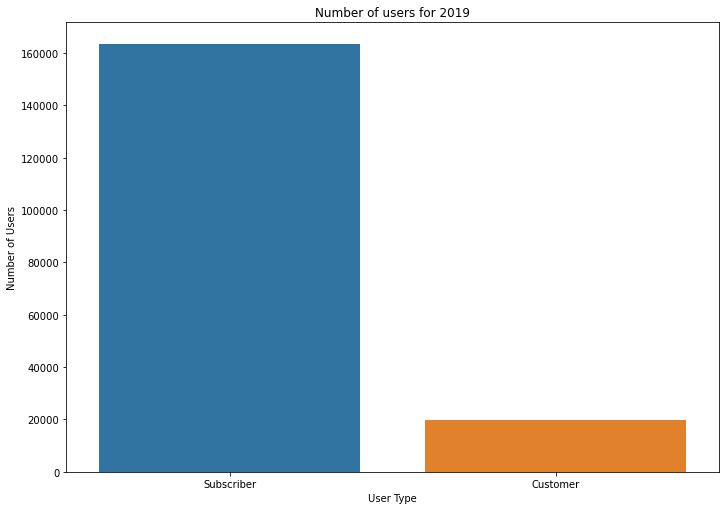

In [17]:
# plot a bar chart
plt.figure(figsize=[11.69, 8.27])
user_category = df['user_type'].value_counts().index
sns.countplot(data = df, x = 'user_type', order = user_category)
plt.title('Number of users for 2019')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

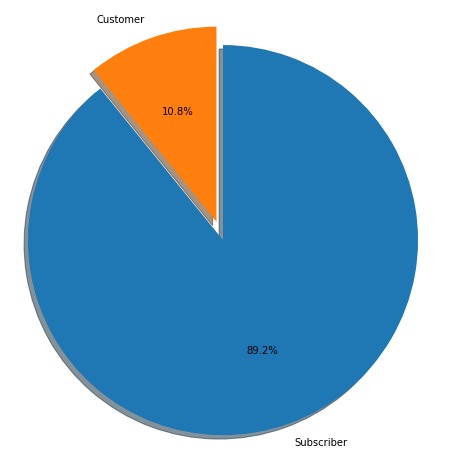

In [18]:
# plot a pie chart
plt.figure(figsize=[11.69, 8.27])
user_category = df['user_type'].value_counts()
plt.pie(user_category, explode =  (0, 0.1), labels = user_category.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.show()

### Observations

* Users included Customer that represents those with a 24-hour pass or 3-day pass, and subscribers those with anual membership.
* The bar chart shows over 160,000 subscribing users and 20,000 customers. 
* Most users are actually subscribers with annual memberships.

Due to the fact that there are so many more people subscribing that using a single day or 3 day pass I think can be attributed to the cost savings. I think there are so many users that are riding bikes daily, tht it makes more cost sense to sign up for an annual membership. 

In [19]:
# labels to use in plots
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

## Distribution of Daily Rides 

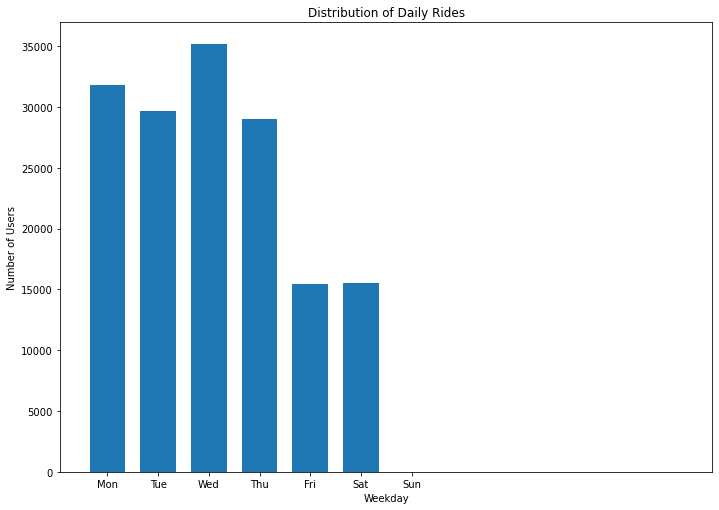

In [20]:
# plot a histogram with gaps between bars
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data = df, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 7 + 1, 1),weekday_labels)
plt.xlabel('start_weekday')
plt.title('Distribution of Daily Rides')
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
plt.show()

### Observations

* Service most used on Wednesdays with over 35,000 for the year. 
* The usage decreases significantly on the weekends and no activity on Sunday.

In [21]:
df.start_weekday.mean

<bound method Series.mean of 0         3
1         3
2         3
3         3
4         3
         ..
183407    4
183408    4
183409    4
183410    4
183411    4
Name: start_weekday, Length: 183412, dtype: int64>

## Distribution of Gender

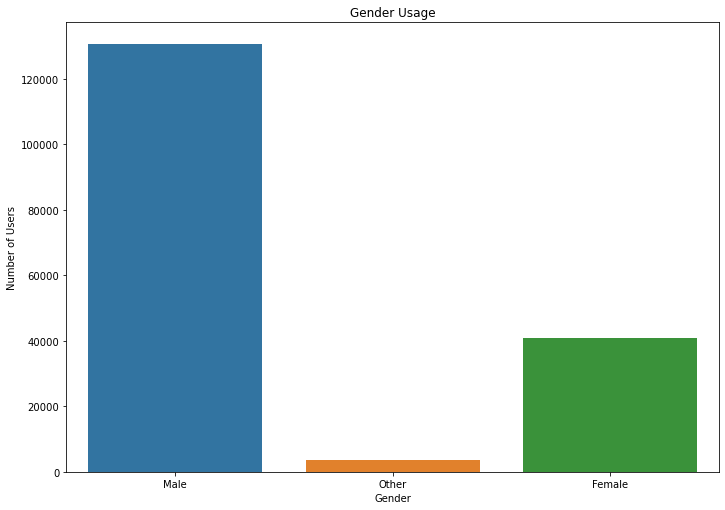

In [22]:
# barplot of gender usage
plt.figure(figsize=[ 11.69, 8.27])
sns.countplot(data = df, x = 'member_gender')
plt.title('Gender Usage')
plt.xlabel('Gender')
plt.ylabel('Number of Users');

### Observations 

* Males use the bike service overwhelmingly more than females and other genders.
* Over 120,000 males used the service in 2019.

The intent was to see how each gender type is spread out and how much of each group is using the bike share service.This distribution reveals that males represents most of the riders. Could this be because males are more into this type of fitness activity. We should have a clearr picture if we factor in more variables like age to see what group of males this number represents.

## Age Distribution

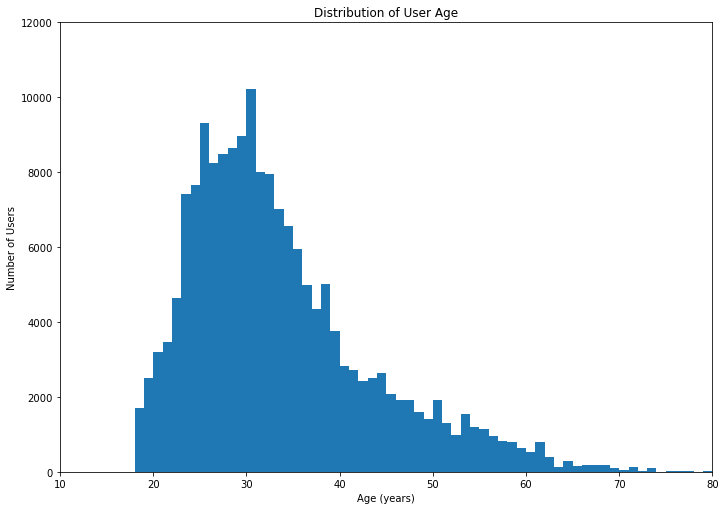

In [23]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

Most users are between the age 25 and 35. There is a steadly decline in usage from age 35 and up.

In [24]:
df.member_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### Observations 

* Most users are between the age 25 and 35. There is a steady decline in usage from age 35 and up
* Males use the bike service three times more than females and other genders. 
* Over 120,000 males used the service in 2019. 

We could make an easy assumption that based on the age group between 25 and 35, you expect to see the longest trip. This is based on what we would expect to be probably the most fit age group and consistent with what we would observe riding.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The bike duration variable took on a large range of values. I did have to perform a log transform. The data looked bimodal under the log transformation with one peak between 8 and 10 minutes.


## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


There was no unusal distributuons. Each variable explored showed what you would expect.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

## Trip Duration and Age

In [25]:
numeric_vars = ['duration_minutes', 'member_birth_year']

In [26]:
from datetime import datetime
df['age'] = datetime.now().year - df.member_birth_year

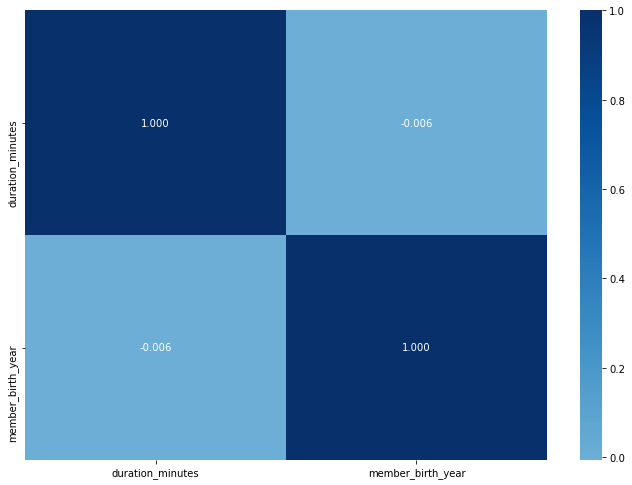

In [27]:
# heatmap to show relationship between variables
plt.figure(figsize=[ 11.69, 8.27])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'Blues', center = 0)
plt.show()

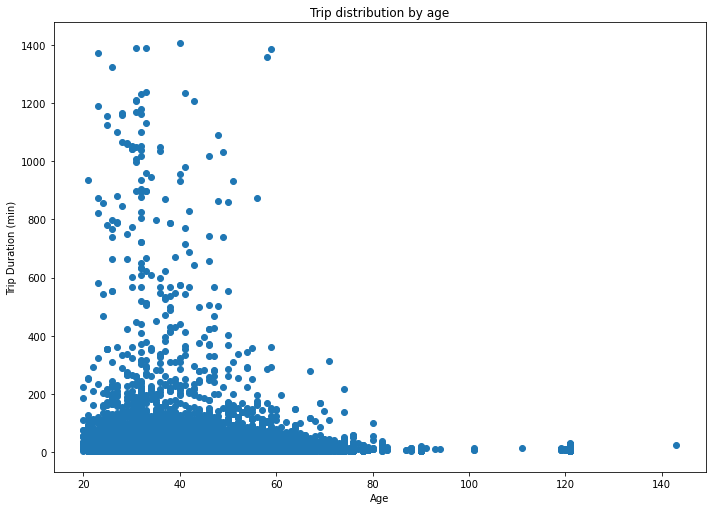

In [28]:
# scatter charts showing distribution between age and trip duration
plt.figure(figsize=[ 11.69, 8.27])
plt.scatter(data = df, x = 'age', y ='duration_minutes', alpha=None)
plt.title('Trip distribution by age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (min)')
plt.show()

### Observation

So with this plot I wanted to look at how trip duration is affected by the age of the user. You can observe that there is a negative correlation where the age decreases as the trip duration increases. The concentration of rides are for persons between ages 25 and 45 showing the inverse relationship between age and the trip duration. It is not surprising that biking trip duration would decrease as you increase in age. Fitness would be less common or intense mong older groups so the bike trip would decrease among a older group.

##  Trip Duration and Gender

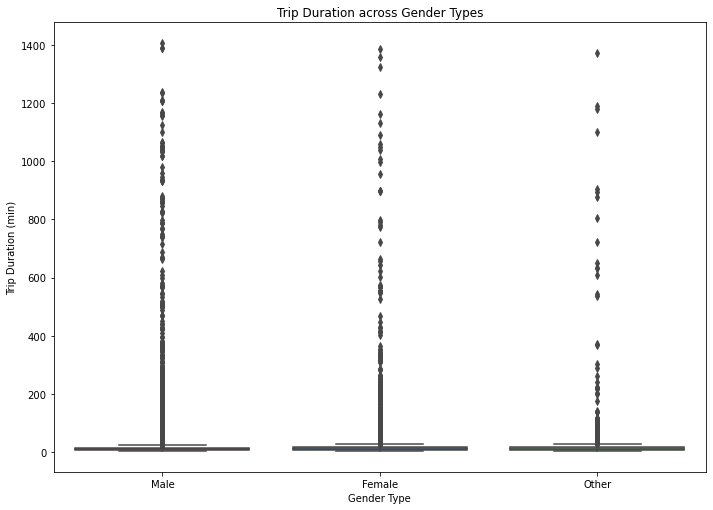

In [29]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# A box plot showing comparisons between quatitative and categorical variables
import seaborn as sns
plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(x='member_gender', y='duration_minutes', data = df, palette = 'Set1', order=['Male', 'Female', 'Other'])
plt.title('Trip Duration across Gender Types')
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (min)')
plt.show()


### Observation

Trimming the trip duration y axis values is best so we can better view the box plot. Trimmed to 50 minutes.

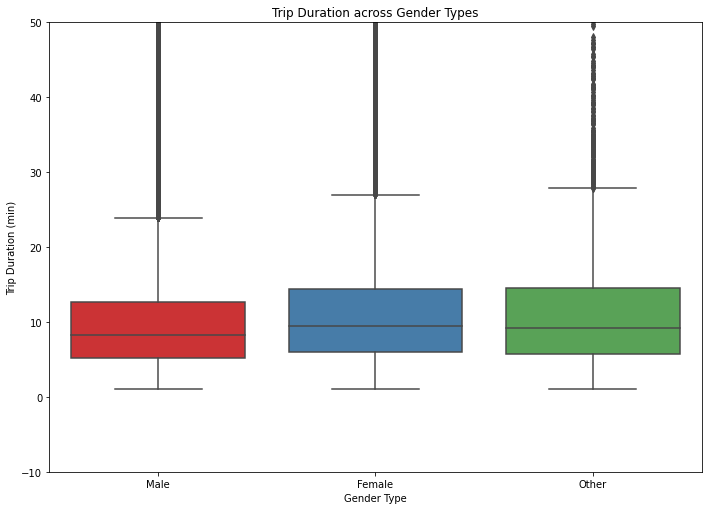

In [30]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# A box plot showing comparisons between quatitative and categorical variables
import seaborn as sns
plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(x='member_gender', y='duration_minutes', data = df, palette ='Set1', order=['Male', 'Female', 'Other'])
plt.ylim(-10, 50)
plt.title('Trip Duration across Gender Types')
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (min)')
plt.show()

### Observation

The boxplot does show that female and other gender have a higher trip duration than males.

## Trip Duration  and User Type

In [31]:
# customer and subscriber from user_type
customer_user = df['user_type']=='Customer'
subscriber_user = df['user_type']=='Subscriber'

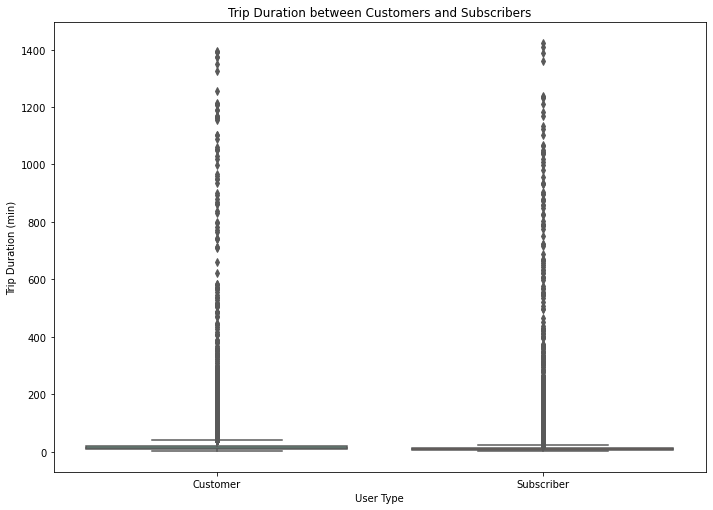

In [32]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# A box plot showing comparisons between quatitative and categorical variables
import seaborn as sns
plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(x='user_type', y='duration_minutes', data = df, palette ='Set2')
plt.title('Trip Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.show()

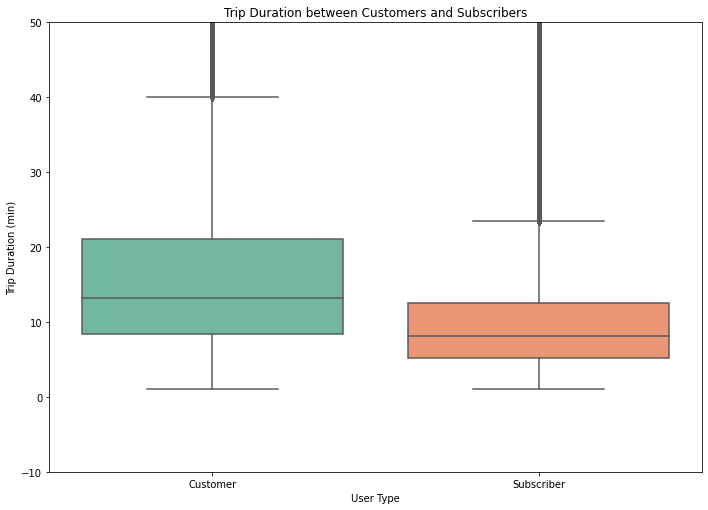

In [33]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# A box plot showing comparisons between quatitative and categorical variables
import seaborn as sns
plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(x='user_type', y='duration_minutes', data = df, palette ='Set2')
plt.ylim(-10, 50)
plt.title('Trip Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.show()

In [34]:
# Average trip duration for Customer

df[customer_user].duration_minutes.mean()


23.87441698543723

In [35]:
# Average trip duration for subscriber

df[subscriber_user].duration_minutes.mean()


10.671061304603203

### Observation

The customer is spending more time on a bike trip than subscribers. Could it be that because customers spend a litle more on a single or 3 day pass that they might be trying to maximize the time that they ride? That may be the reason that there is more than twice as much customers versus subscribers on average riding bikes. 

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationships observed between age and the length of the trip was inversely correlated. The trip duration decreased with an increase in age not surprisingly. 


## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?## Comparing user types over trip duration

When looking at the relationship between gender members and trip duration I was surprised to find that male had the lowest trip duration.

I also found that among users, an actual customer is spending more time on a bike trip than subscribers. I would like to explore more on the difference between a customer and a subscriber and how that translates to different trip times for each group.

## Multivariate Exploration

## Trip Duration vs Age and Gender Type

<Figure size 1080x720 with 0 Axes>

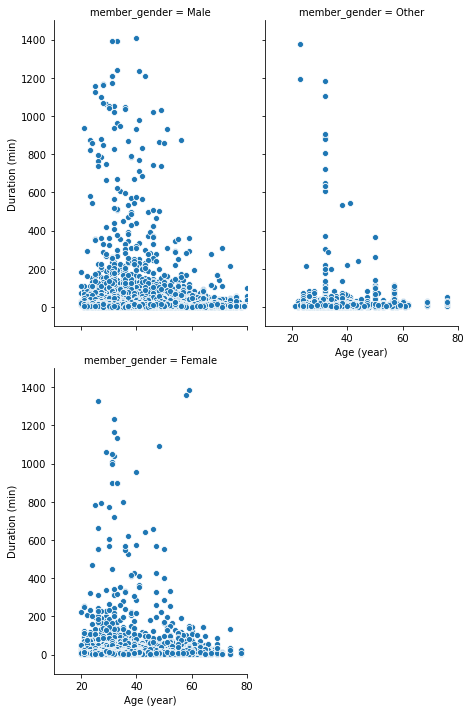

In [36]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
plt.figure(figsize=[15,10])
g = sns.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, height = 5, aspect =0.65, xlim = [10, 80], ylim = [-100, 1500])
g.map_dataframe(sns.scatterplot, 'age', 'duration_minutes', alpha= None)
g.set_axis_labels('Age (year)', 'Duration (min)')
g.add_legend()
plt.show();

### Observation

* Comparing the gender types as it relates to trip duration, the age 20 to 40 represents the group that does most of the rides. * Females and males do appear to have similar ride average.



## Trip Duration vs Weekday and Gender Type

In [37]:
#df['trip_day'] = df.start_time.dt.strftime('%a')

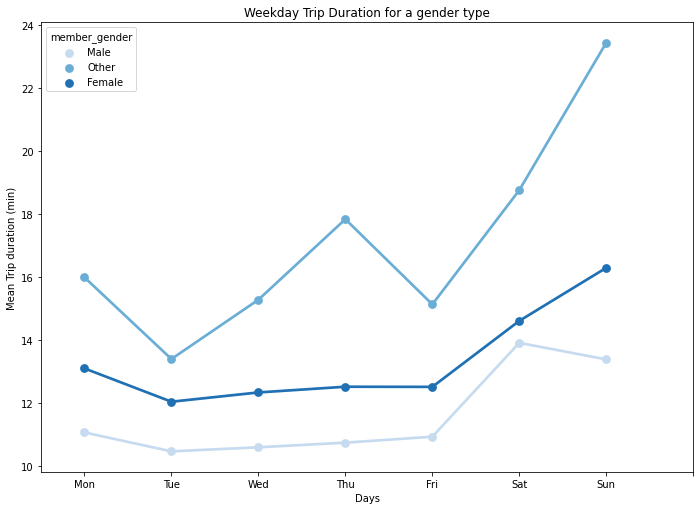

In [38]:
# 
plt.figure(figsize=[11.69, 8.27])
sns.pointplot(data = df, x = 'start_weekday', y = 'duration_minutes', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Weekday Trip Duration for a gender type')
plt.ylabel('Mean Trip duration (min)')
plt.xlabel('Days')
plt.xticks(np.arange(0, 7 + 1, 1),weekday_labels)
plt.show()

### Observation

* The trip duration start trending up on the weekends from Thursdays to Saturdays.
* Males still have the shortest bike trip.

All the gender groups peaked on Fridays to Sunday and increased the length of their bike trips. That makes sense as those riders probably have more time to dedicate to riding. They are probably riding at a different time of day. I notice that although males increase their trip on Fridays to Saturday they are recording the shortest trips of all gender type.

## The End

## References

https://www.markroepke.me/posts/2019/06/05/tips-for-slideshows-in-jupyter.html

https://www.kaggle.com/chirag02/ford-gobike-data-analysis

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

https://github.com/meet3012/Ford-GoBike-System-Data-Visualization/blob/master/Data-Exploration-with-Bike-Data.ipynb

https://github.com/adipurnamk/Ford-GoBike-System-Data/blob/master/exploration_fordgobike_2017.ipynb
https://github.com/ijdev/Ford-GoBike-System-Data---Data-Analysis

https://mnalmelihi.github.io/z

https://www.citibikenyc.com/system-data

In [39]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 434620 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\dainr\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\dainr\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\dainr\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\dainr\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\dainr\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File